In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data_path = r'C:\Projects\Semester6\CS4774\network_intrusion\data\full_data.csv'
full_traffic_data = pd.read_csv(data_path)

C:\Users\tykun\AppData\Local\Temp\ipykernel_38972\1953111644.py:2: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  full_traffic_data = pd.read_csv(data_path)


In [3]:
print(full_traffic_data.shape)
print(full_traffic_data.columns)

(2584228, 85)
Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [4]:
cols_to_drop = [
    'Flow ID',
    'Source IP',
    'Source Port',
    'Destination IP',
    'Destination Port',
    'Protocol',
    'Timestamp'
]

full_traffic_data = full_traffic_data.drop(columns=cols_to_drop)
print(full_traffic_data.shape)

(2584228, 78)


In [5]:
significant = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
print(full_traffic_data.columns)

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [ ]:
#sample if wanted
df = full_traffic_data.groupby('Label', group_keys=False) \
    .apply(lambda x: x.sample(frac=1.0, random_state=42))


valuecount = df['Label'].value_counts()
valid = valuecount[valuecount > 1].index
df = df[df['Label'].isin(valid)]

cols_to_drop = ['Label']
X = df.drop(columns=cols_to_drop, errors='ignore')
y = df['Label']

#remove nan and use only numeric
X_num = ( X.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan).dropna(axis=0))
y = y.loc[X_num.index]

#scale and pca w 95% var kept
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)


pc_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pc_cols, index=X_num.index)
print(f"PCA reduced to {X_pca_df.shape[1]} components")

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\tykun\AppData\Local\Temp\ipykernel_38972\2610041256.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=1.0, random_state=42))


After sampling: Label
BENIGN                        1900514
PortScan                       158930
DDoS                           128027
DoS Hulk                        78843
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Name: count, dtype: int64
PCA reduced to 25 components


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.699137652916198

Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      0.64      0.78    569706
                       Bot       0.02      0.99      0.04       587
                      DDoS       0.76      1.00      0.86     38408
                  DoS Hulk       0.51      0.99      0.67     23577
          DoS Slowhttptest       0.09      0.89      0.16      1650
             DoS slowloris       0.15      0.91      0.25      1739
               FTP-Patator       0.17      1.00      0.29      2380
              Infiltration       0.00      0.73      0.00        11
                  PortScan       0.80      1.00      0.89     47641
               SSH-Patator       0.07      0.97      0.13      1769
  Web Attack  Brute Force       0.01      0.23      0.01       452
Web Attack  Sql Injection       0.00      0.33      0.00         6
          Web Attack  XSS       0.01      0.82      0.02     

In [ ]:
X = df.drop(columns=cols_to_drop, errors='ignore')

numeric_cols = X.select_dtypes(include=['number']).columns
X_num = X[numeric_cols]

#remove inf
X_num = X_num.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

print("Cleaned shape ", X_scaled.shape)
print("Reduced shape ", X_pca.shape)

Cleaned shape: (2293737, 77)
Reduced shape: (2293737, 25)


In [ ]:
labels = np.unique(y_test) 
cm = confusion_matrix(y_test, y_pred, labels=labels)

In [9]:
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
})

print("\nLogistic Regression Coefficients:\n")
for index, row in coeff_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']}")



Logistic Regression Coefficients:

PC1: 7.544831717762783
PC2: 13.696039835509113
PC3: -16.681589561189725
PC4: 9.05993978184662
PC5: -2.4682442906636157
PC6: 3.4435804087819015
PC7: -0.9507866158597963
PC8: 5.521144973564636
PC9: 19.60106658172421
PC10: 2.583765841655887
PC11: 1.6942036928400797
PC12: -0.37582868707559397
PC13: 0.45165660377920114
PC14: 0.3772709320549755
PC15: 1.5746494622276406
PC16: -3.3276037968319265
PC17: 17.23763964883833
PC18: 0.5769256664615886
PC19: 1.8788932286347089
PC20: 13.493731046272178
PC21: 8.108053986305217
PC22: 0.7054006331861146
PC23: -0.2754537311737231
PC24: -2.1633129928011527
PC25: -4.187779968010506


c:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\tykun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


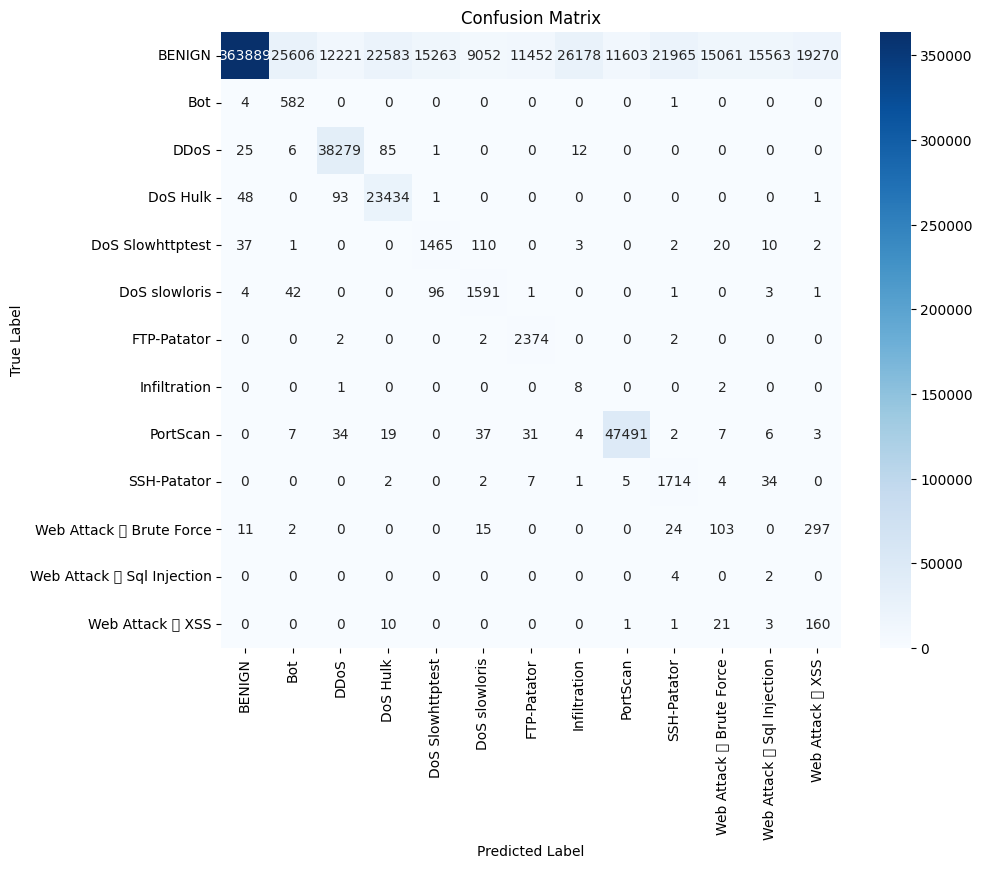

In [10]:
labels = np.unique(y_test)  # capture label order
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion matrix (rows=true, cols=pred):
         BENIGN  !BENIGN
BENIGN   363889   205817
!BENIGN     129   118287


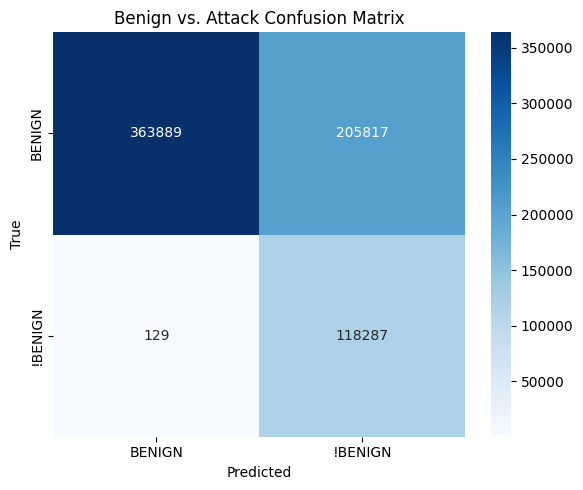

In [ ]:
y_test_bin = np.where(y_test == 'BENIGN', 'BENIGN', '!BENIGN')
y_pred_bin = np.where(y_pred == 'BENIGN', 'BENIGN', '!BENIGN')

labels = ['BENIGN', '!BENIGN']
cm = confusion_matrix(y_test_bin, y_pred_bin, labels=labels)

print("Confusion matrix (rows=true, cols=pred):")
print(pd.DataFrame(cm, index=labels, columns=labels))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Benign vs. Attack Confusion Matrix')
plt.tight_layout()
plt.show()